In [1]:
import pandas as pd
import matplotlib.pyplot as plt


### VISUALIZATIONS (Afternoon run)
NOTE- Wasn't able to run the code full trading session, due to laptop and electricity constraints

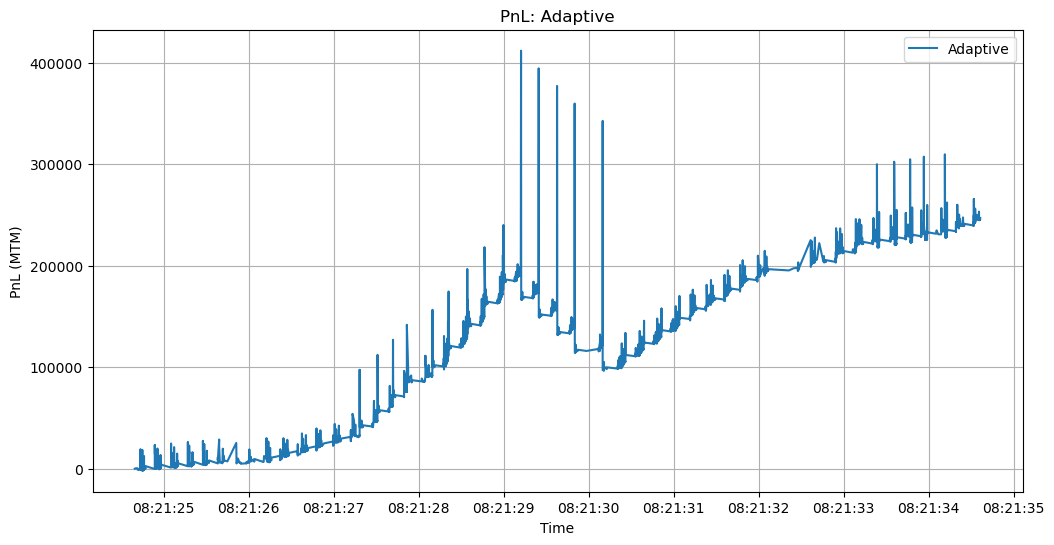

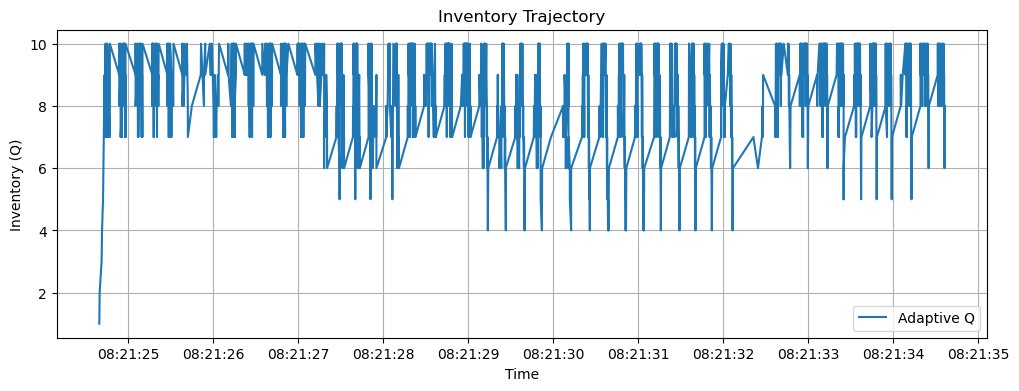

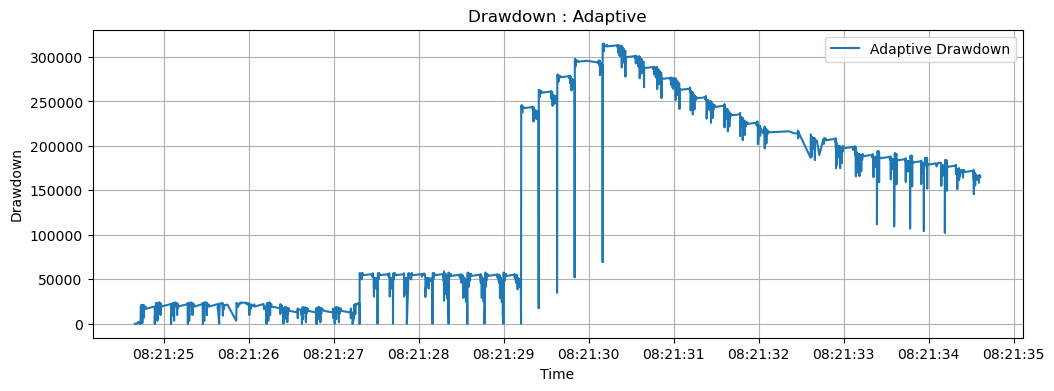

Baseline max drawdown: 8082.5
Adaptive max drawdown: 314902.5
Trade count
Baseline: 40
Adaptive: 2126

Average PnL per trade
Baseline: 24.166666666666668
Adaptive: 116.24352941176471

PnL per unit drawdown (risk-adjusted)
Baseline: 0.11630064955150016
Adaptive: 0.7844173990362097


In [13]:
# # Load CSVs
# baseline = pd.read_csv("baseline_trades.csv")
# adaptive = pd.read_csv("adaptive_trades.csv")
START_ROW = 2126

# Load CSVs
baseline = pd.read_csv("baseline_trades.csv").iloc[:START_ROW].reset_index(drop=True)
adaptive = pd.read_csv("adaptive_trades.csv").iloc[:START_ROW].reset_index(drop=True)


# Compute mid-price
baseline["mid"] = (baseline["best_bid"] + baseline["best_ask"]) / 2
adaptive["mid"] = (adaptive["best_bid"] + adaptive["best_ask"]) / 2

# MTM PnL
baseline["pnl_mtm"] = baseline["cash"] + baseline["Q"] * baseline["mid"]
adaptive["pnl_mtm"] = adaptive["cash"] + adaptive["Q"] * adaptive["mid"]

baseline["time"] = pd.to_datetime(baseline["timestamp"], unit="s")
adaptive["time"] = pd.to_datetime(adaptive["timestamp"], unit="s")

# Plot 1 PnL 
plt.figure(figsize=(12, 6))
# plt.plot(baseline["time"], baseline["pnl_mtm"], label="Baseline")
plt.plot(adaptive["time"], adaptive["pnl_mtm"], label="Adaptive")
plt.xlabel("Time")
plt.ylabel("PnL (MTM)")
# plt.title("PnL Comparison: Baseline vs Adaptive")
plt.title("PnL: Adaptive")
plt.legend()
plt.grid(True)
plt.show()

# Plot 2 Inventory (Q)
plt.figure(figsize=(12, 4))
# plt.plot(baseline["time"], baseline["Q"], label="Baseline Q")
plt.plot(adaptive["time"], adaptive["Q"], label="Adaptive Q")
plt.xlabel("Time")
plt.ylabel("Inventory (Q)")
plt.title("Inventory Trajectory")
plt.legend()
plt.grid(True)
plt.show()


# Drawdown calculation
baseline["cummax_pnl"] = baseline["pnl_mtm"].cummax()
baseline["drawdown"] = baseline["cummax_pnl"] - baseline["pnl_mtm"]

adaptive["cummax_pnl"] = adaptive["pnl_mtm"].cummax()
adaptive["drawdown"] = adaptive["cummax_pnl"] - adaptive["pnl_mtm"]

# Plot 3 Drawdown comparison
plt.figure(figsize=(12, 4))
# plt.plot(baseline["time"], baseline["drawdown"], label="Baseline Drawdown")
plt.plot(adaptive["time"], adaptive["drawdown"], label="Adaptive Drawdown")
plt.xlabel("Time")
plt.ylabel("Drawdown")
# plt.title("Drawdown Comparison: Baseline vs Adaptive")
plt.title("Drawdown : Adaptive")
plt.legend()
plt.grid(True)
plt.show()

print("Baseline max drawdown:", baseline["drawdown"].max())
print("Adaptive max drawdown:", adaptive["drawdown"].max())

#Trade count
baseline_trades = len(baseline)
adaptive_trades = len(adaptive)

print("Trade count")
print("Baseline:", baseline_trades)
print("Adaptive:", adaptive_trades)
print()


#  Average PnL per trade
baseline_avg_pnl = baseline["pnl_mtm"].diff().mean()
adaptive_avg_pnl = adaptive["pnl_mtm"].diff().mean()

print("Average PnL per trade")
print("Baseline:", baseline_avg_pnl)
print("Adaptive:", adaptive_avg_pnl)
print()


#  Risk-adjusted PnL
#  (Final PnL / Max Drawdown)
baseline_final_pnl = baseline["pnl_mtm"].iloc[-1]
adaptive_final_pnl = adaptive["pnl_mtm"].iloc[-1]

baseline_max_dd = baseline["drawdown"].max()
adaptive_max_dd = adaptive["drawdown"].max()

baseline_risk_adj = (
    baseline_final_pnl / baseline_max_dd
    if baseline_max_dd > 0 else float("inf")
)

adaptive_risk_adj = (
    adaptive_final_pnl / adaptive_max_dd
    if adaptive_max_dd > 0 else float("inf")
)

print("PnL per unit drawdown (risk-adjusted)")
print("Baseline:", baseline_risk_adj)
print("Adaptive:", adaptive_risk_adj)


### VISUALIZATIONS (Afternoon run)
NOTE- Wasn't able to run the code full trading session, due to laptop and electricity constraints

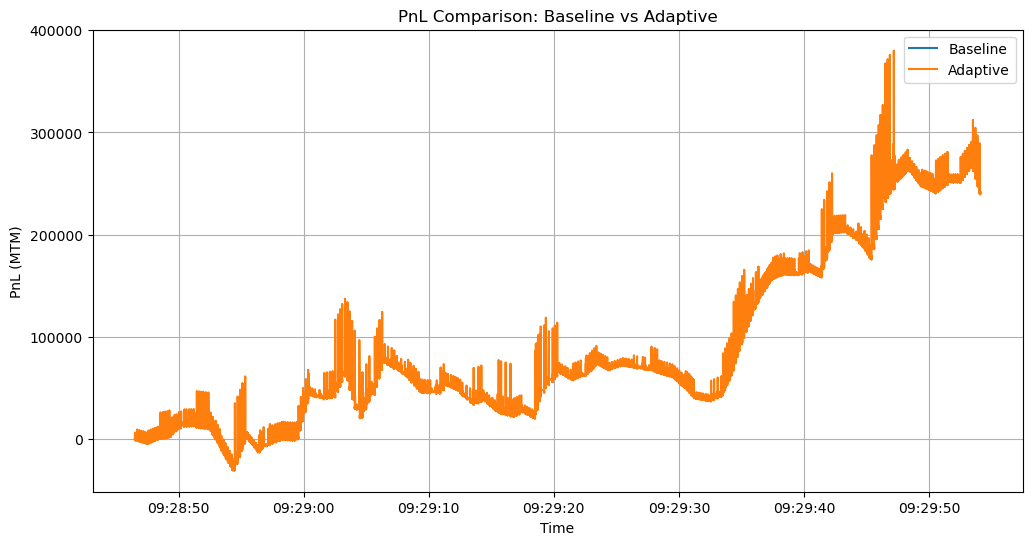

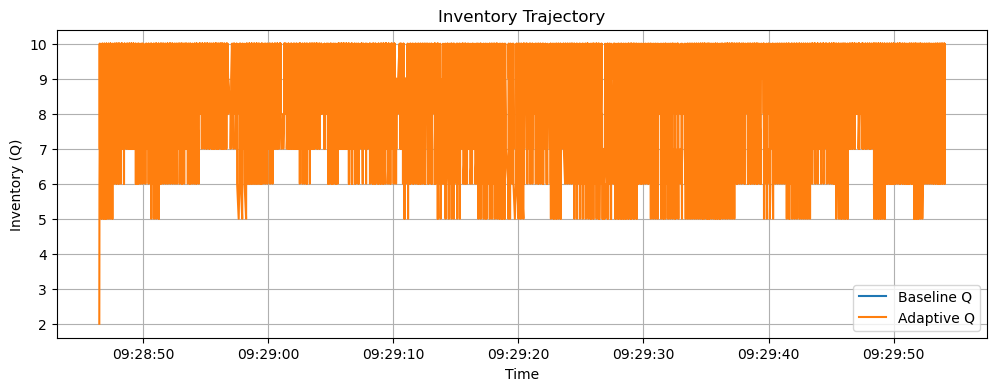

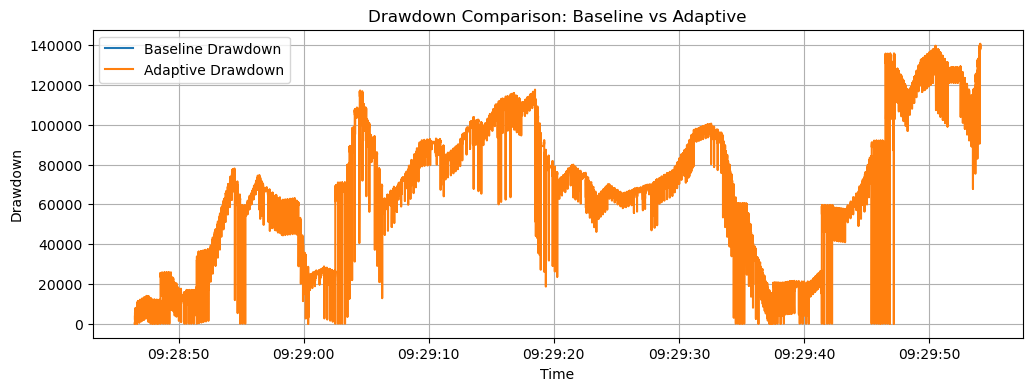

Baseline max drawdown: nan
Adaptive max drawdown: 140750.0
Trade count
Baseline: 0
Adaptive: 12442

Average PnL per trade
Baseline: nan
Adaptive: 19.411823808375534

PnL per unit drawdown (risk-adjusted)
Baseline: inf
Adaptive: 1.7143339253996448


In [7]:
START_ROW = 2175

# Load CSVs
baseline = pd.read_csv("baseline_trades.csv").iloc[START_ROW:].reset_index(drop=True)
adaptive = pd.read_csv("adaptive_trades.csv").iloc[START_ROW:].reset_index(drop=True)

# Compute mid-price
baseline["mid"] = (baseline["best_bid"] + baseline["best_ask"]) / 2
adaptive["mid"] = (adaptive["best_bid"] + adaptive["best_ask"]) / 2

# MTM PnL
baseline["pnl_mtm"] = baseline["cash"] + baseline["Q"] * baseline["mid"]
adaptive["pnl_mtm"] = adaptive["cash"] + adaptive["Q"] * adaptive["mid"]

baseline["time"] = pd.to_datetime(baseline["timestamp"], unit="s")
adaptive["time"] = pd.to_datetime(adaptive["timestamp"], unit="s")

# Plot 1 PnL 
plt.figure(figsize=(12, 6))
plt.plot(baseline["time"], baseline["pnl_mtm"], label="Baseline")
plt.plot(adaptive["time"], adaptive["pnl_mtm"], label="Adaptive")
plt.xlabel("Time")
plt.ylabel("PnL (MTM)")
plt.title("PnL Comparison: Baseline vs Adaptive")
plt.legend()
plt.grid(True)
plt.show()

# Plot 2 Inventory (Q)
plt.figure(figsize=(12, 4))
plt.plot(baseline["time"], baseline["Q"], label="Baseline Q")
plt.plot(adaptive["time"], adaptive["Q"], label="Adaptive Q")
plt.xlabel("Time")
plt.ylabel("Inventory (Q)")
plt.title("Inventory Trajectory")
plt.legend()
plt.grid(True)
plt.show()


# Drawdown calculation
baseline["cummax_pnl"] = baseline["pnl_mtm"].cummax()
baseline["drawdown"] = baseline["cummax_pnl"] - baseline["pnl_mtm"]

adaptive["cummax_pnl"] = adaptive["pnl_mtm"].cummax()
adaptive["drawdown"] = adaptive["cummax_pnl"] - adaptive["pnl_mtm"]

# Plot 3 Drawdown comparison
plt.figure(figsize=(12, 4))
plt.plot(baseline["time"], baseline["drawdown"], label="Baseline Drawdown")
plt.plot(adaptive["time"], adaptive["drawdown"], label="Adaptive Drawdown")
plt.xlabel("Time")
plt.ylabel("Drawdown")
plt.title("Drawdown Comparison: Baseline vs Adaptive")
plt.legend()
plt.grid(True)
plt.show()

print("Baseline max drawdown:", baseline["drawdown"].max())
print("Adaptive max drawdown:", adaptive["drawdown"].max())

#Trade count
baseline_trades = len(baseline)
adaptive_trades = len(adaptive)

print("Trade count")
print("Baseline:", baseline_trades)
print("Adaptive:", adaptive_trades)
print()


#  Average PnL per trade
baseline_avg_pnl = baseline["pnl_mtm"].diff().mean()
adaptive_avg_pnl = adaptive["pnl_mtm"].diff().mean()

print("Average PnL per trade")
print("Baseline:", baseline_avg_pnl)
print("Adaptive:", adaptive_avg_pnl)
print()

baseline_max_dd = baseline["drawdown"].max()
adaptive_max_dd = adaptive["drawdown"].max()

baseline_risk_adj = (
    baseline_final_pnl / baseline_max_dd
    if baseline_max_dd > 0 else float("inf")
)

adaptive_risk_adj = (
    adaptive_final_pnl / adaptive_max_dd
    if adaptive_max_dd > 0 else float("inf")
)

print("PnL per unit drawdown (risk-adjusted)")
print("Baseline:", baseline_risk_adj)
print("Adaptive:", adaptive_risk_adj)
